In [1]:
# This notebook is a tutorial about how to extract data and metadata from NetCDF files

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import copy
from pandas.plotting import register_matplotlib_converters
import copy
import os
import netCDF4 as nc4            # to work with netCDFs
import numpy   as np             # to perform numerics
import time

register_matplotlib_converters()
os.getcwd()

'g:\\Shared drives\\Ryoko and Hilary\\SMSigxModel\\analysis\\0_data_preprocessing\\script'

In [3]:
watershed = ['9-Coweeta']

In [4]:
path  = r"g:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\0_data_preprocessing\raw_data\CHOSEN" #os.getcwd()
path

'g:\\Shared drives\\Ryoko and Hilary\\SMSigxModel\\analysis\\0_data_preprocessing\\raw_data\\CHOSEN'

## Print out NetCDF file

In [5]:
ws='Coweeta'
File=ws+'_NetCDF.nc'
ncdf = nc4.Dataset(path +'/'+ File, 'r')

In [6]:
ncdf.variables['Discharge']

<class 'netCDF4._netCDF4.Variable'>
float64 Discharge(Dim_Datetime, Dim_Discharge_Grid)
    names: ['Prentiss_Discharge', 'Coweeta_Discharge']
    time: ['2000-02-26', '2018-10-31']
    units: L/s
    data_source_link: http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=3033
unlimited dimensions: 
current shape = (6823, 2)
filling off

In [18]:
ncdf.variables['SoilMoisture'].data_source_link

['http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=1309 (136,236,336)',
 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=1308 (132,232,332)',
 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=1305 (107,207,307)',
 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=1304 (105,205,305)',
 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=1307 (418)',
 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=1303 (102,202,302)',
 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=1306 (1306)',
 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=1301 (BentCreek11,BentCreek21)']

In [7]:
for v in ncdf.variables:
    print(ncdf.variables[v])

<class 'netCDF4._netCDF4.Variable'>
float64 Datetime(Dim_Datetime)
    range: ['2000-02-26', '2018-10-31']
unlimited dimensions: 
current shape = (6823,)
filling off
<class 'netCDF4._netCDF4.Variable'>
vlen Grid(Dim_Grid)
    Latitude: ['39.15', '', '33.89655', '35.04826', '35.11535', '35.32116', '35.18539', '35.067189', '35.0734', '35.181048', '35.24270', '35.22737', '35.16331', '35.14298', '35.824828', '', '35.069427', '35.054105', '35.069255', '', '35.051459', '35.06131400', '35.067855', '35.056714', '35.068576', '35.0506480', '35.0593010', '35.065818', '35.058029', '35.065977', '35.0493880', '35.0578120', '', '35.667943', '35.667198', '35.666348']
    Longitude: ['-83.37972', '', '-83.362289', '-83.45428', '-83.46619', '-83.79736', '-83.62215', '-83.384413', '-83.16843', '-83.385019', '-83.33727', '-83.45130', '-83.36320', '-83.48930', '-82.555420', '', '-83.437335', '-83.423798', '-83.440717', '', '-83.462251', '-83.47058383', '-83.436667', '-83.426877', '-83.440269', '-83.4606291

## Get Datetime Information

In [8]:
def get_time_range(ws):
    # ws=watershed[watershed_number-1].split('-')[1]
    print(ws)
    File=ws+'_NetCDF.nc'
    ncdf = nc4.Dataset(path +'/'+ File, 'r')
    dt_lst=[pd.to_datetime(i) for i in ncdf.variables['Datetime'][:]]
    ncdf.close()
    print(ws+' data is from', dt_lst[0], 'to',dt_lst[-1])
    #return [str(dt_lst[0]),str(dt_lst[1])]

In [9]:
get_time_range(1)

1


TypeError: unsupported operand type(s) for +: 'int' and 'str'

## Get Station Information

In [ ]:
def get_station_name(ws):
    # ws=watershed[watershed_number-1].split('-')[1]
    print(ws)
    File=ws+'_NetCDF.nc'
    ncdf = nc4.Dataset(path +'/'+ File, 'r')
    stn_names=ncdf.variables['Grid'][:]
    ncdf.close()
    return stn_names
def get_station_latitude(ws):
    # ws=watershed[watershed_number-1].split('-')[1]
    print(ws)
    File=ws+'_NetCDF.nc'
    ncdf = nc4.Dataset(path +'/'+ File, 'r')
    stn_names=ncdf.variables['Grid'].Latitude
    ncdf.close()
    return stn_names
def get_station_longitude(ws):
    # ws=watershed[watershed_number-1].split('-')[1]
    print(ws)
    File=ws+'_NetCDF.nc'
    ncdf = nc4.Dataset(path +'/'+ File, 'r')
    stn_names=ncdf.variables['Grid'].Longitude
    ncdf.close()
    return stn_names
def get_station_elevation(ws): # in meter
    # ws=watershed[watershed_number-1].split('-')[1]
    print(ws)
    File=ws+'_NetCDF.nc'
    ncdf = nc4.Dataset(path +'/'+ File, 'r')
    stn_names=ncdf.variables['Grid'].Elevation_m
    ncdf.close()
    return stn_names

In [ ]:
ncdf.variables['Grid'][:]

array(['Prentiss', 'Coweeta', 'Whitehall', 'CoweetaMid',
       'LowerJonesCreek', 'GrahamCounty', 'WineSpring', 'TessenteeFarm',
       'Cullasaja', 'FranklinCentral', 'FranklinNE', 'FranklinNW',
       'FranklinSE', 'FranklinSW', 'MHOpen', '1039', 'CWT102', 'CWT105',
       'CWT107', 'CWT227', 'CWT132', 'CWT136', 'CWT202', 'CWT205',
       'CWT207', 'CWT232', 'CWT236', 'CWT302', 'CWT305', 'CWT307',
       'CWT332', 'CWT336', 'CWT418', 'BentCreek1', 'BentCreek2',
       'BentCreek3'], dtype=object)

In [ ]:
get_station_name(ws)

Coweeta


array(['Prentiss', 'Coweeta', 'Whitehall', 'CoweetaMid',
       'LowerJonesCreek', 'GrahamCounty', 'WineSpring', 'TessenteeFarm',
       'Cullasaja', 'FranklinCentral', 'FranklinNE', 'FranklinNW',
       'FranklinSE', 'FranklinSW', 'MHOpen', '1039', 'CWT102', 'CWT105',
       'CWT107', 'CWT227', 'CWT132', 'CWT136', 'CWT202', 'CWT205',
       'CWT207', 'CWT232', 'CWT236', 'CWT302', 'CWT305', 'CWT307',
       'CWT332', 'CWT336', 'CWT418', 'BentCreek1', 'BentCreek2',
       'BentCreek3'], dtype=object)

In [10]:
get_station_latitude(ws)

NameError: name 'get_station_latitude' is not defined

In [11]:
lon = get_station_longitude(ws)
lon

NameError: name 'get_station_longitude' is not defined

In [12]:
get_station_elevation(ws)

NameError: name 'get_station_elevation' is not defined

## Extract Data Table

In [13]:
def get_data(ws,variable_names_lst=[]): # variable_names_lst=[] to get all the data
    # ws=watershed[watershed_number-1].split('-')[1]
    print(ws)
    File=ws+'_NetCDF.nc'
    ncdf = nc4.Dataset(path +'/'+ File, 'r')
    keys_lst=list(ncdf.variables.keys())
    len_keys=len(keys_lst)
    print("Hydrometeorological variables in this watershed are:")
    all_variables=keys_lst[2:int(len_keys/2)]
    print(all_variables)
    if variable_names_lst==[]:
        for i,var in enumerate(all_variables):
            indexUnique = pd.date_range(str(pd.to_datetime(ncdf.variables['Datetime'][:][0])), 
                                        str(pd.to_datetime(ncdf.variables['Datetime'][:][-1])))  
            var_df=pd.DataFrame(ncdf.variables[var][:], index=indexUnique, 
                                columns = [ncdf.variables[var].names])
            if i==0:
                former_df=var_df
            else:
                former_df=pd.concat([former_df,var_df],axis=1,join='outer')
    else:
        for i,var in enumerate(variable_names_lst):
            indexUnique = pd.date_range(str(pd.to_datetime(ncdf.variables['Datetime'][:][0])), 
                                        str(pd.to_datetime(ncdf.variables['Datetime'][:][-1])))  
            
            if ncdf.variables[var][:].shape[1]==1:
                var_df=pd.DataFrame(ncdf.variables[var][:], index=indexUnique, columns = [ncdf.variables[var].names])
            else:
                var_df=pd.DataFrame(ncdf.variables[var][:], index=indexUnique, columns = ncdf.variables[var].names)
            
            if i==0:
                former_df=var_df
            else:
                former_df=pd.concat([former_df,var_df],axis=1,join='outer')      
    ncdf.close()
    former_df.index.rename('DateTime',inplace = True)
    return former_df

In [14]:
dis_df.variables['Discharge']

NameError: name 'dis_df' is not defined

Coweeta
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']


<AxesSubplot:xlabel='DateTime'>

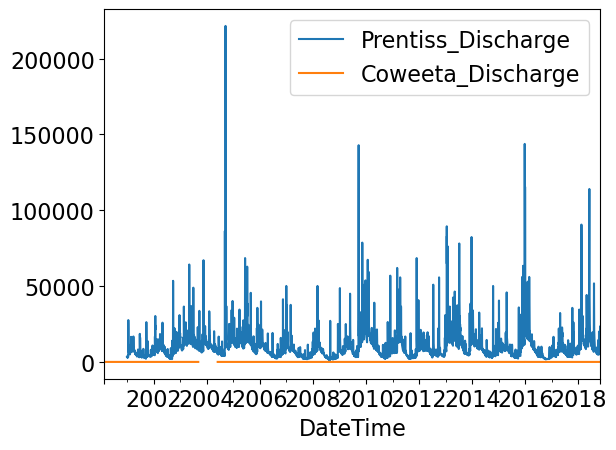

In [15]:
# get data for single hydrometeorological variable (filled data)
dis_df=get_data(ws,['Discharge'])
dis_df.plot()

Coweeta
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']


<AxesSubplot:xlabel='DateTime'>

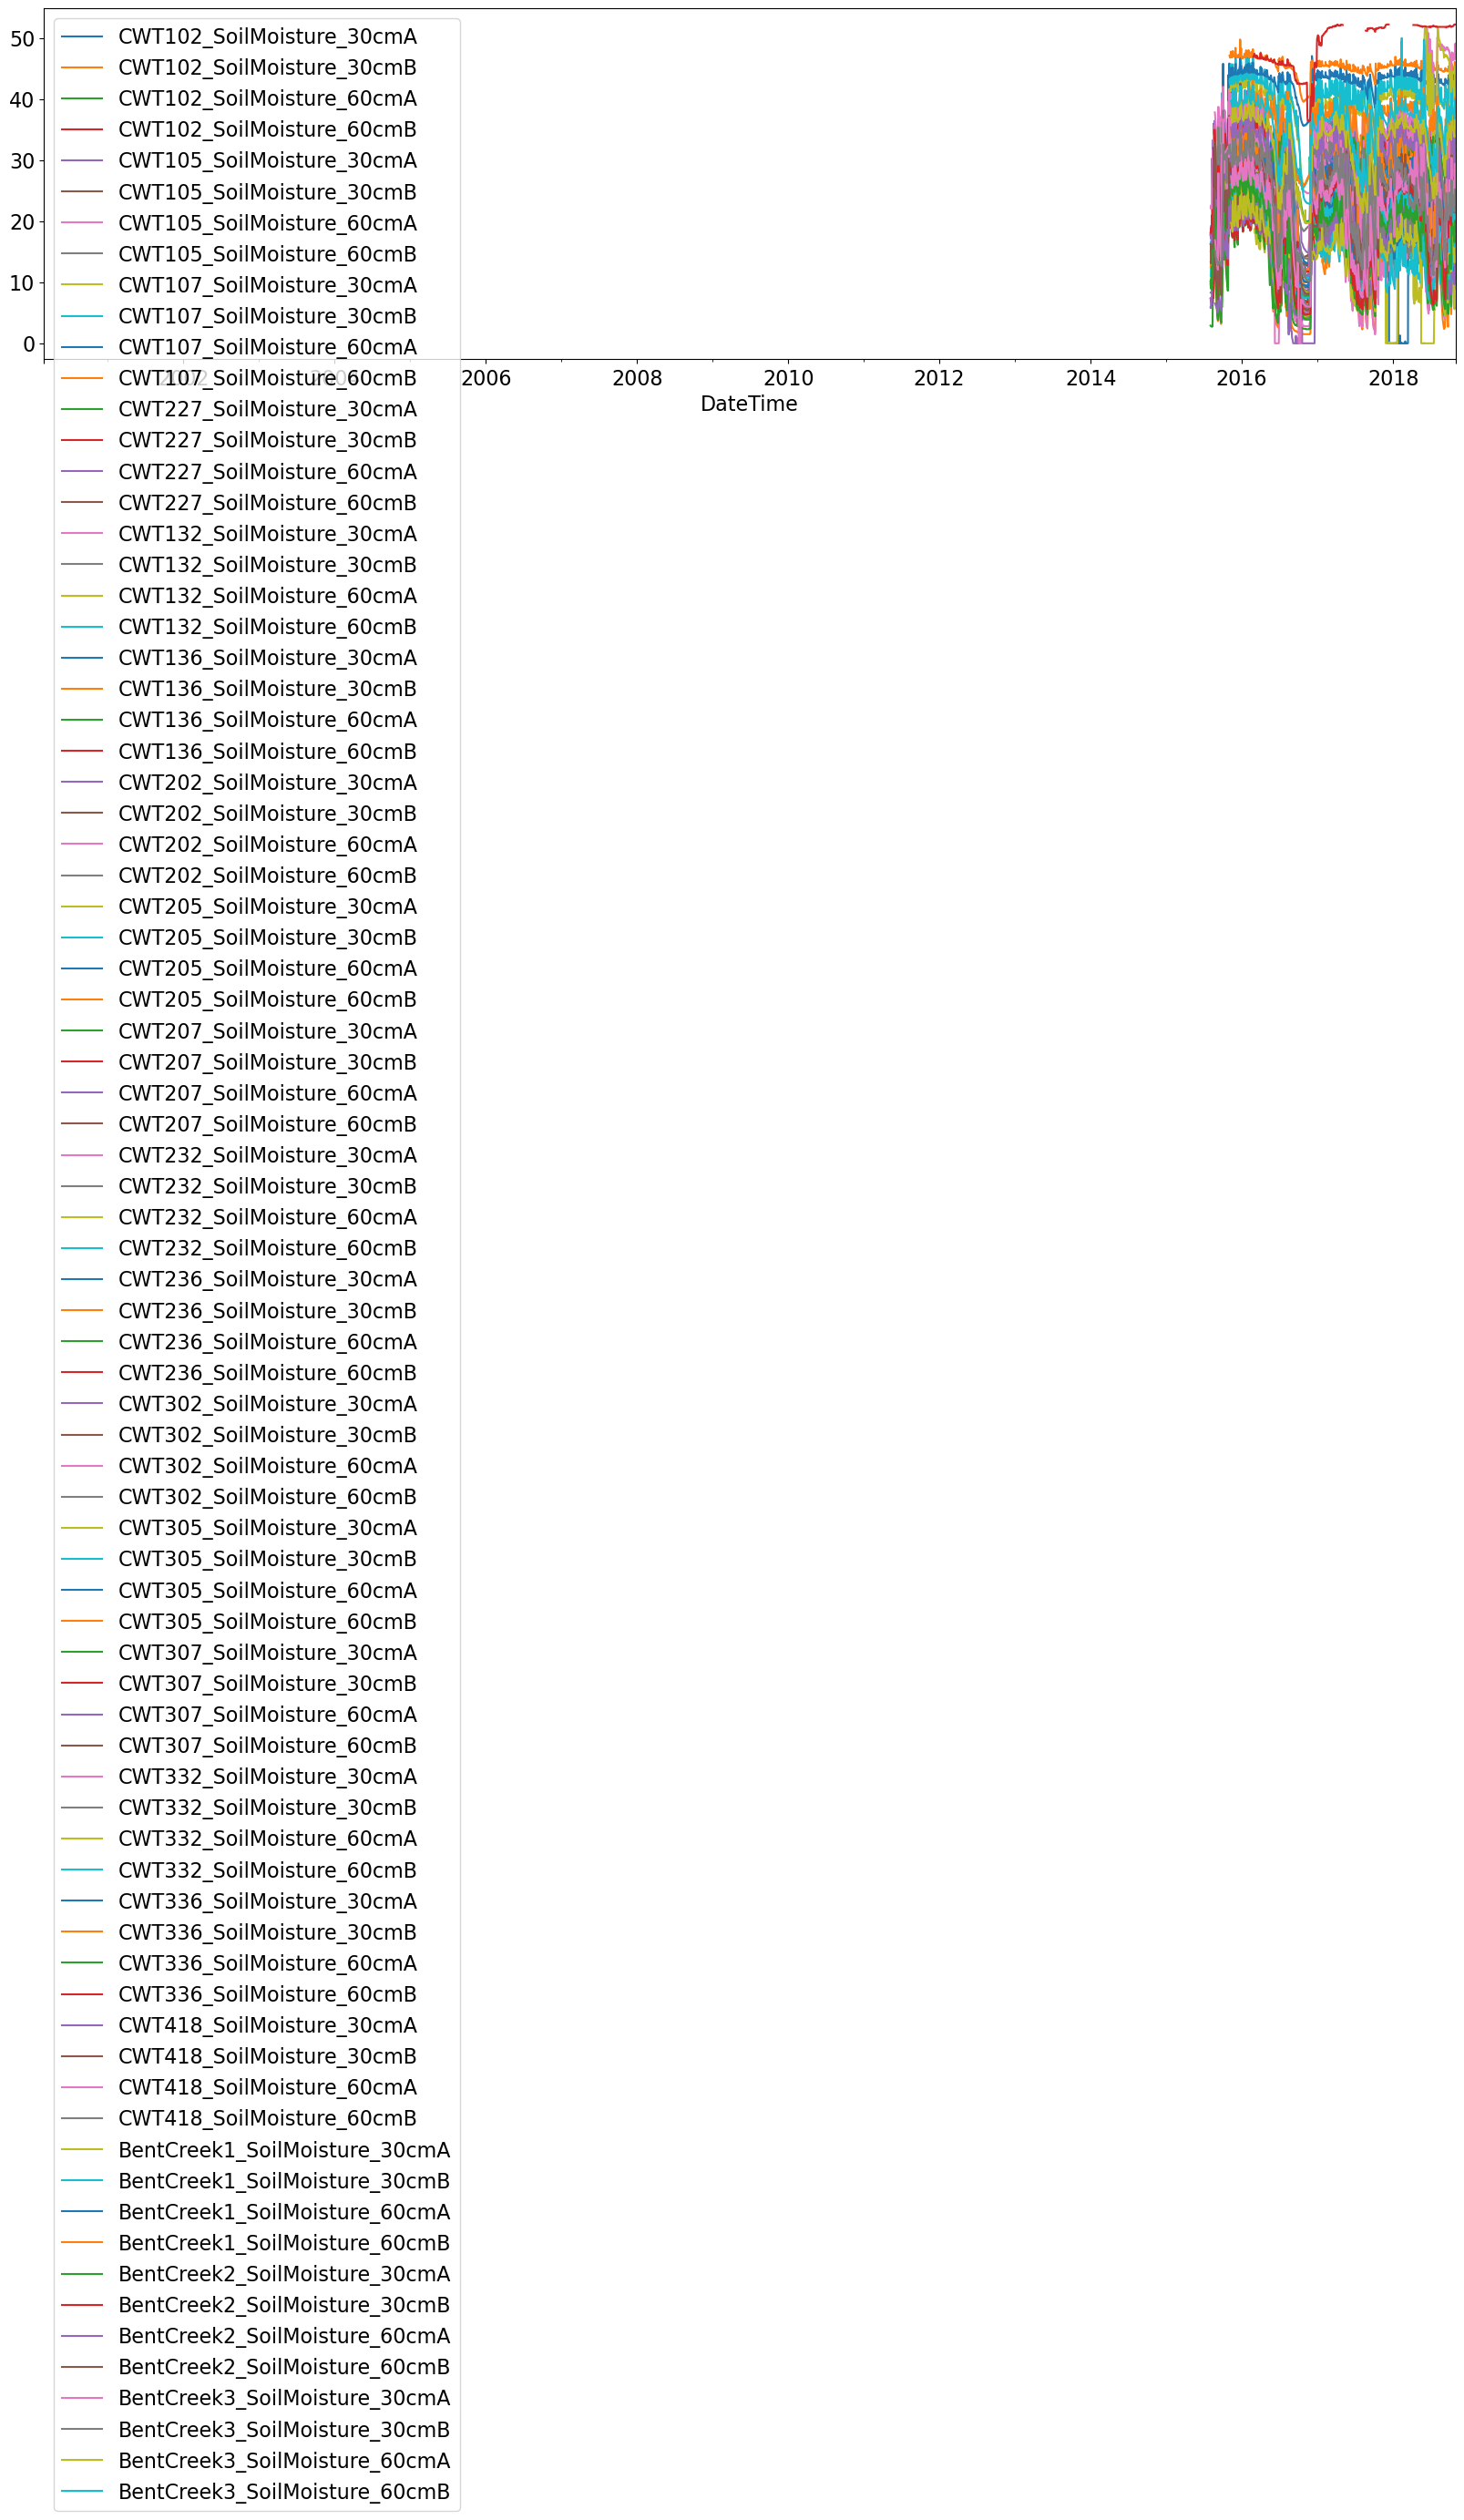

In [16]:
df_sm=get_data(ws,['SoilMoisture'])
df_sm.plot(figsize=(20,5))

In [63]:
# get data for all hydrometeorological variables (filled data)
df=get_data(ws,[])
df.head()

Coweeta
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']


,"(Prentiss_Discharge,)","(Coweeta_Discharge,)","(Whitehall_Precipitation,)","(CoweetaMid_Precipitation,)","(LowerJonesCreek_Precipitation,)","(GrahamCounty_Precipitation,)","(WineSpring_Precipitation,)","(TessenteeFarm_Precipitation,)","(Cullasaja_Precipitation,)","(FranklinCentral_Precipitation,)",...,"(BentCreek1_SoilMoisture_60cmA,)","(BentCreek1_SoilMoisture_60cmB,)","(BentCreek2_SoilMoisture_30cmA,)","(BentCreek2_SoilMoisture_30cmB,)","(BentCreek2_SoilMoisture_60cmA,)","(BentCreek2_SoilMoisture_60cmB,)","(BentCreek3_SoilMoisture_30cmA,)","(BentCreek3_SoilMoisture_30cmB,)","(BentCreek3_SoilMoisture_60cmA,)","(BentCreek3_SoilMoisture_60cmB,)"
DateTime,,,,,,,,,,,,,,,,,,,,,
2000-02-26,NaN,2.386390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-27,NaN,2.755713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-28,NaN,2.471618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,2.386390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-01,NaN,2.301162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Coweeta
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']


<AxesSubplot:xlabel='DateTime'>

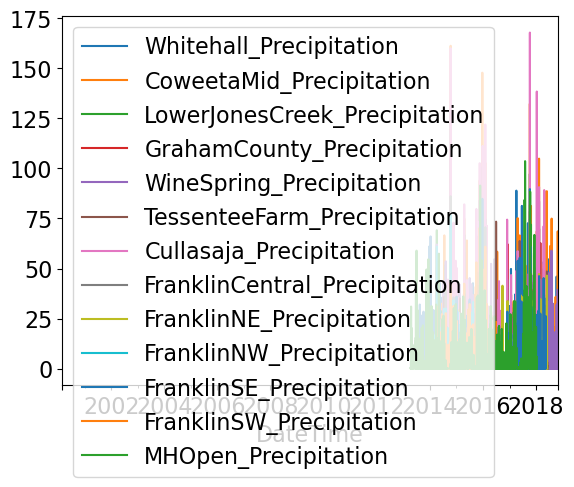

In [64]:
df=get_data(ws,['Precipitation'])
df.plot()

## Extract Flag Table

In [25]:
def get_flag_data(ws,variable_names_lst=[]): # variable_names_lst=[] to get all the data
    # ws=watershed[watershed_number-1].split('-')[1]
    print(ws)
    File=ws+'_NetCDF.nc'
    ncdf = nc4.Dataset(path +'/'+ File, 'r')
    keys_lst=list(ncdf.variables.keys())
    len_keys=len(keys_lst)
    print("Hydrometeorological variables in this watershed are:")
    all_variables=keys_lst[2:int(len_keys/2)]
    print(all_variables)
    
    if variable_names_lst==[]:
        for i,var in enumerate(all_variables):
            indexUnique = pd.date_range(str(pd.to_datetime(ncdf.variables['Datetime'][:][0])), str(pd.to_datetime(ncdf.variables['Datetime'][:][-1])))  
            var_df=pd.DataFrame(ncdf.variables[var+'_Flag'][:], index=indexUnique, 
                                columns = ncdf.variables[var].names)
            if i==0:
                former_df=var_df
            else:
                former_df=pd.concat([former_df,var_df],axis=1,join='outer')
    else:
        for i,var in enumerate(variable_names_lst):
            indexUnique = pd.date_range(str(pd.to_datetime(ncdf.variables['Datetime'][:][0])), str(pd.to_datetime(ncdf.variables['Datetime'][:][-1])))  
            
            if ncdf.variables[var][:].shape[1]==1:
                var_df=pd.DataFrame(ncdf.variables[var+'_Flag'][:], index=indexUnique,  columns = [ncdf.variables[var].names])
            else:
                var_df=pd.DataFrame(ncdf.variables[var+'_Flag'][:], index=indexUnique,  columns = ncdf.variables[var].names)
            if i==0:
                former_df=var_df
            else:
                former_df=pd.concat([former_df,var_df],axis=1,join='outer')      
    ncdf.close()
    former_df.index.rename('DateTime',inplace = True)
    return former_df

In [27]:
# get flag table for single hydrometeorological variable
dis_flag=get_flag_data(ws,['Discharge'])
dis_flag.head()

Coweeta
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']


,Prentiss_Discharge,Coweeta_Discharge
DateTime,,
2000-02-26,NaN,1.0
2000-02-27,NaN,1.0
2000-02-28,NaN,1.0
2000-02-29,NaN,1.0
2000-03-01,NaN,1.0


In [35]:
dis_flag=get_flag_data(ws,['SoilMoisture'])
dis_flag.head()

Coweeta
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']


,CWT102_SoilMoisture_30cmA,CWT102_SoilMoisture_30cmB,CWT102_SoilMoisture_60cmA,CWT102_SoilMoisture_60cmB,CWT105_SoilMoisture_30cmA,CWT105_SoilMoisture_30cmB,CWT105_SoilMoisture_60cmA,CWT105_SoilMoisture_60cmB,CWT107_SoilMoisture_30cmA,CWT107_SoilMoisture_30cmB,...,BentCreek1_SoilMoisture_60cmA,BentCreek1_SoilMoisture_60cmB,BentCreek2_SoilMoisture_30cmA,BentCreek2_SoilMoisture_30cmB,BentCreek2_SoilMoisture_60cmA,BentCreek2_SoilMoisture_60cmB,BentCreek3_SoilMoisture_30cmA,BentCreek3_SoilMoisture_30cmB,BentCreek3_SoilMoisture_60cmA,BentCreek3_SoilMoisture_60cmB
DateTime,,,,,,,,,,,,,,,,,,,,,
2000-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Get flag table for all the hydrometeorological variables
flag_df=get_flag_data(ws,[])
flag_df.head()

Coweeta
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']


TypeError: Index(...) must be called with a collection of some kind, '1039_VaporPressure' was passed